In [67]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline


In [68]:
data = [[3.0, 1.0, 1],
        [2.8, 0.9, 1],
        [1.2, 1.8, 0],
        [0.9, 1.6, 0],
        [1.3, 1.5, 0],
        [2.5, 1.2, 1],
        [2.2, 1.0, 1],
        [1.1, 1.9, 0],
      ]
secret_flower = [2.9, 1.1]


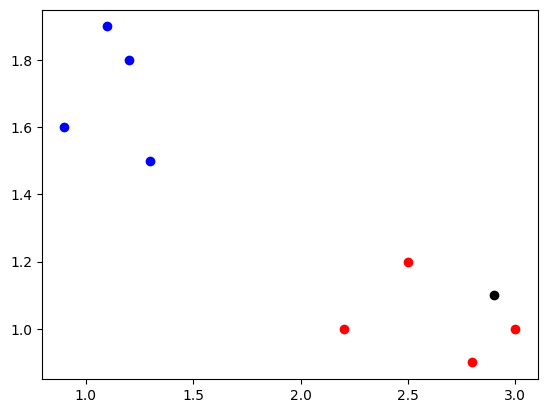

In [69]:
for i in data:
    color = "r"
    if i[2]==0:
        color="b"
    plt.scatter(i[0],i[1],color=color)
plt.scatter(secret_flower[0],secret_flower[1],color="black")

In [126]:
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()
print(w1,w2,b)

0.15853608127587487 0.5419986752307062 1.0919576405793796


In [71]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x)*(1-sigmoid(x))

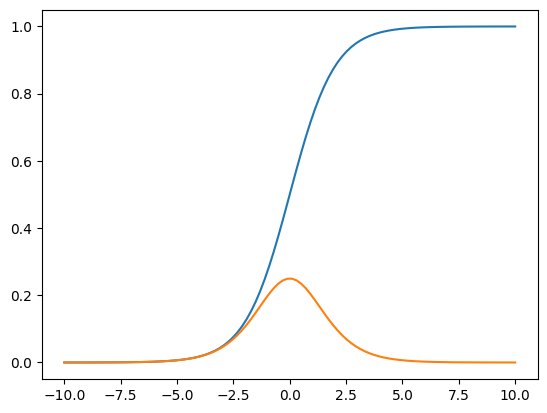

In [72]:

X = np.linspace(-10, 10, 100)
Y = sigmoid(X)
Y_P = sigmoid_p(X)

plt.plot(X,Y)
plt.plot(X,Y_P)

In [73]:
def network(flower):
    return w1 * flower[0] + w2 * flower[1] + b

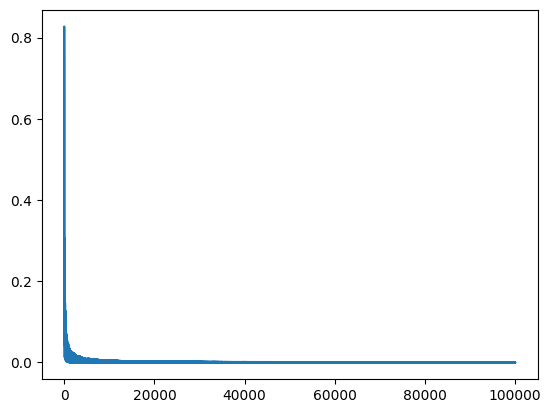

In [127]:
# training loop
costs = []
LR = 0.1

for i in range(100000):
    random_index = np.random.randint(len(data))
    flower = data[random_index]
    
    nn =  w1 * flower[0] + w2 * flower[1] + b
    # nn = network(flower)
    
    result = sigmoid(nn)

    expected = flower[2]

    cost = (result - expected)**2

    costs.append(cost)

    d_cost_d_result = 2*(result - expected)

    d_result_d_nn = sigmoid_p(nn)

    d_nn_d_w1 = flower[0]
    d_nn_d_w2 = flower[1]
    d_nn_d_b = 1

    d_cost_d_w1 = d_cost_d_result * d_result_d_nn * d_nn_d_w1
    d_cost_d_w2 = d_cost_d_result * d_result_d_nn * d_nn_d_w2
    d_cost_d_b = d_cost_d_result * d_result_d_nn * d_nn_d_b

    w1 = w1 - d_cost_d_w1*LR
    w2 = w2 - d_cost_d_w2*LR
    b = b - d_cost_d_b*LR

    # print(result,cost)
plt.plot(costs)
